In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from sklearn.cluster import KMeans
import community


In [11]:
filein = 'sorted_data'
network = pd.read_csv(filein, sep = '\t', header = 0)

In [12]:
weight_scale = pd.to_numeric(network['count'])/(network['count'].min())

In [13]:
G=nx.OrderedGraph()
G=nx.from_pandas_dataframe(network, 'node1', 'node2', ['count'])
for n in G.nodes():
    G.node[n]['connectivity'] = float(len(list(G.neighbors(n))))

    
#G.edges(data=True)

In [14]:
pos=nx.spring_layout(G, k = 0.25, weight = 'count', iterations=50000, scale = 2)

In [15]:
parts = community.best_partition(G, randomize=True)
values = [parts.get(node) for node in G.nodes()]

k=0
for n in G.nodes():
    G.node[n]['community'] = values[k]
    k = k+1
community.modularity(parts,G)


0.10807562890562415

In [16]:
color = [num[1] for num in list(parts.items())]
between= nx.betweenness_centrality(G,weight='count')
centrality = [num[1] for num in list(between.items())]
size = [i*10000 for i in centrality]

between

{1: 0.0,
 2: 0.1043956043956044,
 3: 0.04395604395604396,
 4: 0.02197802197802198,
 5: 0.03296703296703297,
 6: 0.07692307692307693,
 7: 0.0,
 8: 0.19230769230769232,
 9: 0.06593406593406594,
 10: 0.03296703296703297,
 11: 0.09340659340659341,
 12: 0.20329670329670332,
 13: 0.0,
 14: 0.016483516483516484,
 15: 0.09340659340659341}

In [17]:
#nx.draw_kamada_kawai(G, iteration = 5000)
nx.draw_networkx_edges(G, pos = pos, width = weight_scale/3, alpha=0.4, style = 'solid')
nx.draw_networkx_nodes(G, pos = pos, cmap=plt.get_cmap('tab20b'), node_color=values, node_size=35)
nx.draw_networkx_labels(G, pos = pos, font_size=10)

#cp = nv.CircosPlot(G, node_order='community',node_color= 'community', cmap = plt.get_cmap('RdYlBu'), with_labels=True)
#nx.draw_networkx_edges(G, pos = pos, width = 0.5, alpha=0.1, style = 'solid')
#nx.draw(G, node_order = values, node_color = values, cmap=plt.get_cmap('jet'), node_size=35, font_size=6, with_labels=True, linewidths=0.5 )
plt.axis('off')
#cp.draw()
#plt.show()
plt.savefig('network_communities.png', dpi=300)

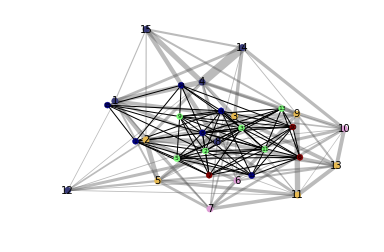

In [18]:
nx.draw(G, node_order = values, node_color = values, cmap=plt.get_cmap('jet'), node_size=35, font_size=6, with_labels=True, linewidths=0.5 )

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 

plt.show()